In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('assignment1Data/users.dat', sep='::', header=None, names=unames, engine='python')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('assignment1Data/ratings.dat', sep='::', header=None, names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('assignment1Data/movies.dat', sep='::', header=None, names=mnames, engine='python')

In [3]:
data = pd.merge(pd.merge(ratings,users),movies)

In [4]:
#QUESTION 1
dataToBeSplit = data.assign(**{'genres':data['genres'].str.split('|')})
splitedDataFrame = data.loc[data.index.repeat(data['genres'].str.split('|').str.len())]
splitedDataFrame = splitedDataFrame.assign(**{'genres':np.concatenate(dataToBeSplit['genres'].values)})

In [19]:
splitedDataFrame[100:]

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
100,335,1193,3,976363703,M,35,18,55434,One Flew Over the Cuckoo's Nest (1975),Drama
101,339,1193,5,976341234,M,50,7,80207,One Flew Over the Cuckoo's Nest (1975),Drama
102,340,1193,3,976341657,F,25,3,28001,One Flew Over the Cuckoo's Nest (1975),Drama
103,349,1193,4,1007923963,M,1,10,08035,One Flew Over the Cuckoo's Nest (1975),Drama
104,352,1193,5,976325688,M,18,4,60115,One Flew Over the Cuckoo's Nest (1975),Drama
105,353,1193,4,976323254,F,35,7,92625,One Flew Over the Cuckoo's Nest (1975),Drama
106,355,1193,5,976320590,M,18,3,55107,One Flew Over the Cuckoo's Nest (1975),Drama
107,357,1193,5,976317574,M,18,0,98103,One Flew Over the Cuckoo's Nest (1975),Drama
108,361,1193,5,976315638,F,25,14,94115,One Flew Over the Cuckoo's Nest (1975),Drama
109,366,1193,4,976310958,M,50,15,55126,One Flew Over the Cuckoo's Nest (1975),Drama


In [6]:
mean_ratings = splitedDataFrame.pivot_table('rating', index='genres', aggfunc='mean')


In [7]:
mean_ratings[:5]

,rating
genres,
Action,3.491185
Adventure,3.477257
Animation,3.684868
Children's,3.422035
Comedy,3.522099


In [8]:
mean_ratings_by_gender = splitedDataFrame.pivot_table('rating', index='genres', columns='gender', aggfunc='mean')

In [9]:
mean_ratings_by_gender[:5]

gender,F,M
genres,,
Action,3.490252,3.491386
Adventure,3.512879,3.468125
Animation,3.744702,3.661335
Children's,3.572548,3.358961
Comedy,3.571938,3.503667


In [10]:
#QUESTION 2
top_female_ratings = mean_ratings_by_gender.sort_values(by='F', ascending=False)

In [11]:
top_female_ratings[:5]

gender,F,M
genres,,
Film-Noir,4.018087,4.092254
Documentary,3.946392,3.928811
War,3.893138,3.893375
Musical,3.809108,3.596332
Drama,3.765662,3.766589


In [12]:
#QUESTION 3
top_male_ratings = mean_ratings_by_gender.sort_values(by='M', ascending=False)

In [13]:
top_male_ratings[:5]

gender,F,M
genres,,
Film-Noir,4.018087,4.092254
Documentary,3.946392,3.928811
War,3.893138,3.893375
Drama,3.765662,3.766589
Crime,3.689332,3.713720


In [14]:
#QUESTION 4 MOVIE NAME : 12 Angry Men (1957)
all_movies_mean_rating = splitedDataFrame.pivot_table('rating', index='title', columns='age', aggfunc='mean')
all_movies_mean_rating[9:10]

age,1,18,25,35,45,50,56
title,,,,,,,
12 Angry Men (1957),4.176471,4.032609,4.408654,4.358333,4.274194,4.287879,4.235294


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F00D0146A0>,
      dtype=object)

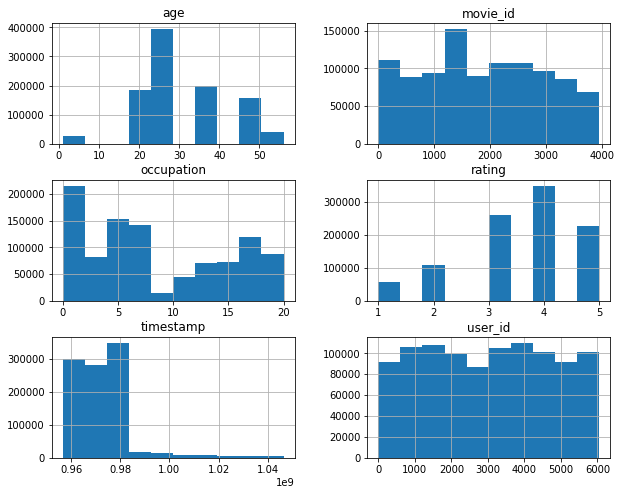

In [15]:
#QUESTION 5
data.hist(figsize=(10,8))

For Age Histogram : The people in the age group of 18-24 years have rated the movie most.
For movie_id Histogram : The movies betweeen the id 1000 -2000 have been rated most.
For occupation Histogram : People belonging 'other' occupation category and 'college/grad student' occupation category review movie most. 

In [21]:
#Question 4
def recommend(data,user_name,movie_name):
    l = data.loc[(data['movie_id']== movie_name) & (data['user_id'] == user_name)]
    given_rating = l.iloc[0]['rating']
    p = data.loc[(data['rating'] == given_rating) & (data['movie_id'] == movie_name)]
    list1 = p[p['user_id'] != user_name]
    list2 = list1.user_id
    return list2

In [20]:
recommend(data,235,1193)

0          1
1          2
4         17
6         19
7         24
9         33
10        39
16        53
17        54
18        58
22        81
23        88
24        89
25        95
28       102
30       107
32       120
33       123
34       131
38       150
40       155
41       166
42       169
43       175
45       180
46       190
49       195
53       208
61       236
64       259
        ... 
1668    5859
1669    5865
1670    5868
1674    5888
1676    5890
1682    5911
1684    5917
1685    5920
1687    5924
1690    5942
1693    5948
1694    5949
1695    5950
1697    5954
1698    5956
1699    5958
1700    5962
1701    5964
1702    5965
1706    5975
1708    5977
1709    5978
1712    5986
1714    6001
1715    6002
1718    6021
1719    6032
1720    6033
1721    6035
1722    6036
Name: user_id, Length: 936, dtype: int64